In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

import pickle
from CONSTANTS import *
from Utils.helpers import *

## Scaling across modes

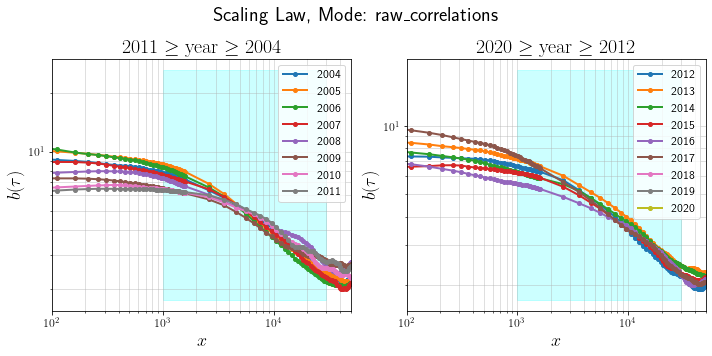

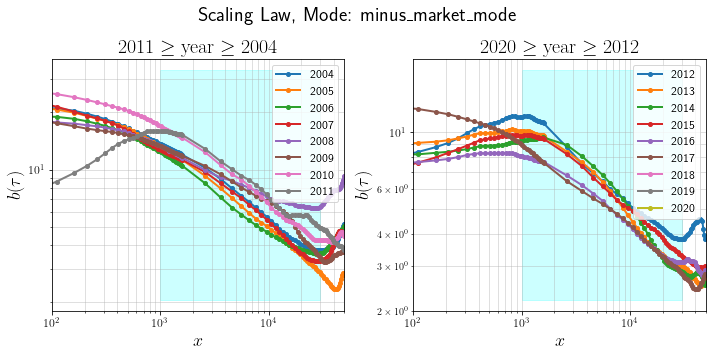

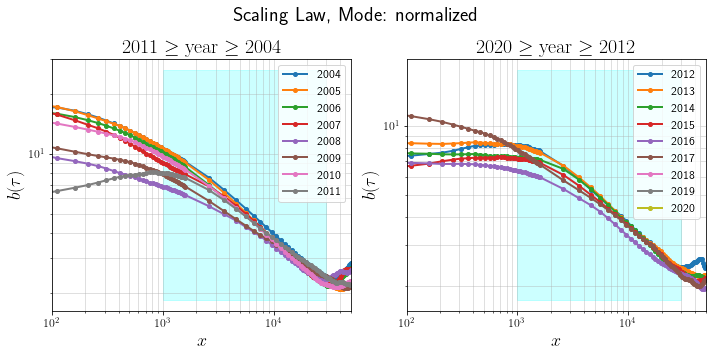

In [3]:
for mode in ["raw_correlations", "minus_market_mode", "normalized"]:
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plt.rc('text', usetex=True)

    X_small = []
    y_small = []
    labels_small = []

    X_big = []
    y_big = []
    labels_big = []
    
    for year in years[:]:
        sigmas = []
        
        for tau in taus:
            with open(f"{path}Histograms/hist_{mode}_{year}_{tau}.pkl", "rb") as f:
                response = pickle.load(f)
            sigmas.append(1.0/response["sigma"]) # inverse STD
            
        if year < plotting_year_cutoff:
            X_small.append(taus)
            y_small.append(sigmas)
            labels_small.append(f"{year}")
        else:
            X_big.append(taus)
            y_big.append(sigmas)
            labels_big.append(f"{year}")
                
    axs[0] = plot(X_small, y_small, labels_small, r"$x$", r"$b(\tau)$", r"$2011 \ge \mathrm{year} \ge 2004$", highlight_x = [1000,30000], dpi=300, log_x = True, log_y = True, axes = axs[0], plot_scaling=True) 
    axs[1] = plot(X_big, y_big, labels_big, r"$x$", r"$b(\tau)$", r"$2020 \ge \mathrm{year} \ge 2012$", highlight_x = [1000,30000], dpi=300, log_x = True, log_y = True, axes = axs[1], plot_scaling=True)       
    fig.suptitle(f"Scaling Law, Mode: {mode}", fontsize=20)
    plt.tight_layout()
    plt.show()   